# Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a>
    <ul><a href="#quality">Quality</a></ul>
    <ul><a href="#tidiness">Tidiness</a></ul>
</li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storing">Storing Cleaned Data </a></li>
<li><a href="#insights_visualization">Insights and Visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

For this project, Our goal is to work through this notebook and wrangle(gather, assess, clean) tweet archive of Twitter user @dog_rates, popularly known as 'WeRateDogs' to create interesting and insightful analysis and visualizations.

To get started, let's import our libraries.

In [798]:
# importing python packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import tweepy 
import json
import re

%matplotlib inline

<a id='gathering'></a>
### Data Gathering

 [I. Enhanced Twitter Archive](#enhanced_tweet)<br>
 [II. Image Predictions File](#image_prediction)<br>
 [III. Additional Data via the Twitter API](#add_tweet)

<a id='enhanced_tweet'></a>
####  I - Enhanced Twitter Archive

In [799]:
# Reading 'twitter-archive-enhanced.csv' file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [800]:
# Reading first few rows to confirm if dataset is imported successfully
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='image_prediction'></a>
#### II- Image Predictions File

In [801]:
# downloading 'image-predictions.tsv' programmatically from Udacity server using the Requests library 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [802]:
# Reading 'image-predictions.tsv' file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [803]:
# Reading first few rows to confirm if dataset is imported successfully
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='add_tweet'></a>
#### III- Additional Data via the Twitter API

In [5]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [804]:
# reading the data from 'tweet-json.txt', line by line and storing it in dataframe
list_for_df = []

with open('tweet-json.txt') as json_file:
    for line in json_file:
        additional_data = json.loads(line)
        
        tweet_id = additional_data['id']
        favorite_count = additional_data['favorite_count']
        retweet_count = additional_data['retweet_count']
        followers_count = additional_data['user']['followers_count']
                
        list_for_df.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count,
                        'followers_count': followers_count
                        })

# creating a new DataFrame 
twitter_json = pd.DataFrame(list_for_df, columns = ['tweet_id', 'favorite_count', 'retweet_count','followers_count'])
twitter_json.head()

# Saving the dataFrame in file
twitter_json.to_csv('tweet_json.txt')

In [805]:
# Reading first few rows to confirm if dataset is imported successfully in dataframe.
twitter_json.head()

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,39467,8853,3200889
1,892177421306343426,33819,6514,3200889
2,891815181378084864,25461,4328,3200889
3,891689557279858688,42908,8964,3200889
4,891327558926688256,41048,9774,3200889


#### Data Gathering Summary
We have finished with the very first step in the data wrangling by importing the data from three differrent sources into the Jupyter Notebook.
Three different sourses are stores in three different dataframes in pandas as follows.<br>
        1. twitter_archive (from Enhanced Twitter Archive  )
        2. image_predictions ( from Image Predictions File )
        3. twitter_json ( from Additional Data via the Twitter API)


<a id='assessing'></a>
### Data Assessing

###### Visual Assessment
Before going for programatic assessment, We will load all three datasets and visually assess the dataset to find any quality or tidiness issue. This will also help us enhance our knowledge regarding dataset.

In [806]:
# loading 'twitter_archive' dataframe to visually assess and know more about it.
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [807]:
# loading 'image_predictions' dataframe to visually assess and know more about it.
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [808]:
# loading 'twitter_json' dataframe to visually assess and know more about it.
twitter_json

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,39467,8853,3200889
1,892177421306343426,33819,6514,3200889
2,891815181378084864,25461,4328,3200889
3,891689557279858688,42908,8964,3200889
4,891327558926688256,41048,9774,3200889
5,891087950875897856,20562,3261,3200889
6,890971913173991426,12041,2158,3200889
7,890729181411237888,56848,16716,3200889
8,890609185150312448,28226,4429,3200889
9,890240255349198849,32467,7711,3200889


###### Programmatic Assessment
 As we are done with visual assessment, now we will assess the dataframes programmatically to gain deeper insight.

In [809]:
# using 'info()' function  to see if there are null values and coulmns have correct datatypes
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [810]:
# using 'info()' function  to see if there are null values and coulmns have correct datatypes
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [811]:
# using 'info()' function  to see if there are null values and coulmns have correct datatypes
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [812]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [813]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [814]:
twitter_archive[twitter_archive.rating_denominator != 10 ].count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [815]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [816]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Buddy         7
Bailey        7
Daisy         7
Toby          7
Koda          6
Scout         6
Milo          6
Bella         6
Leo           6
Stanley       6
Jax           6
Dave          6
Oscar         6
Rusty         6
Jack          6
Larry         5
           ... 
Remy          1
Odin          1
Pete          1
Mona          1
Filup         1
Biden         1
Kollin        1
Zuzu          1
O             1
Robin         1
Tessa         1
Lulu          1
Jarod         1
Dutch         1
Coleman       1
Tess          1
Danny         1
Siba          1
Bluebert      1
Mosby         1
Kara          1
light         1
Gin           1
Berb          1
Reagan        1
Pumpkin       1
Sailer        1
Champ         1
Bloop         1
Molly         1
Name: name, Length: 957,

In [817]:
twitter_archive[twitter_archive['name']=='None'].count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

In [818]:
sum(image_predictions.jpg_url.duplicated())

66

In [819]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [820]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [821]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
toy_terrier                        20
malinois                           20
chow                               20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [822]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [823]:
twitter_json.followers_count.value_counts()

3200891    232
3200950    198
3200943    193
3200947    127
3200901    118
3200892     86
3200952     76
3200894     69
3200953     65
3200951     64
3201004     60
3200945     59
3200944     53
3200890     52
3200895     51
3201018     50
3201002     49
3201003     48
3201006     43
3201008     41
3200900     35
3200898     35
3201014     35
3200908     35
3201016     34
3200897     29
3201015     26
3200906     26
3201011     25
3201017     25
          ... 
3200889     20
3200896     19
3201010     17
3201007     16
3200904     16
3200907     13
3201001     12
3200949     12
3200948     10
3200899      5
3200903      5
3200858      4
3200942      4
3200859      4
3200860      4
3201000      3
3200946      2
3200893      2
3200851      2
3200816      1
3200810      1
3200862      1
3200802      1
3200799      1
3201013      1
3200913      1
3200910      1
3200918      1
3200809      1
3200800      1
Name: followers_count, Length: 66, dtype: int64

<a id='quality'></a>
#### Quality
##### `twitter_archive` table

- There are retweets.
- unwanted or extra columns which we won't use for this analysis
- The entries in 'source' column are not readableas they are in HTML format with a and \a tags surrounding the text.
- 'timestamp' is in 'object' datatype.
- tweet_id is an integer. ( we aren't performing any calculations on it)
- 'name' column have missing values labelled as "None".
- 'name' column contains invalid names.(ex. a, an etc.) ('Cannot address programmaticaly with greater accuracy')
- 23 invalid values in 'rating_denominator' column.

##### `image_predictions` table
- tweet_id is an integer.
- 'jpg_url' coulumns have duplicate entries. 
- p1,p2,p3 columns are not consistantly in upper or lower case

##### `twitter_json` table
- tweet_id is an integer.


<a id='tidiness'></a>
#### Tidiness
- All three tables are informing about same tweets so they can be merged together
- twitter_archive table has four column for 'dog_stage' variable


<a id='cleaning'></a>
### Data Cleaning

In [824]:
# Creating copies of the dataframes before cleaning

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = twitter_json.copy()

##### Tidiness issue 1
###### Define
Merge all three dataframes together 

###### code

In [825]:
# merging 'twitter_archive_clean' and 'tweet_json_clean' and forming single dataframe as 'main'
main = pd.merge(left=twitter_archive_clean, right=tweet_json_clean, left_on='tweet_id', right_on='tweet_id', how='outer')

In [826]:
# now merging 'twitter_archive_clean' and 'image_predictions_clean' and forming single dataframe as 'main'
main = main.merge(image_predictions_clean, on='tweet_id', how='outer')

###### Test

In [827]:
# confirming whether the merging is done with listing column names.
list(main)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorite_count',
 'retweet_count',
 'followers_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

##### Tidiness issue 2
###### Define 
Add single column for 'dog_stage' variable

###### code

In [828]:
# Extracting 'dog_stage' from 'doggo', 'floofer', 'pupper', 'puppo' columns
main['dog_stage'] = main['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [829]:
# Checking if dog_stage is extracted for desired values
main[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [830]:
# Drop doggo, floofer, pupper, and puppo columns
main = main.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

###### Test

In [831]:
# listing columns to see if 'doggo', 'floofer', 'pupper', 'puppo' columns have dropeed and 'dog_stage' column is created.
list(main)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'followers_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

##### Quality issue 1
###### Define
Remove retweets

###### Code

In [832]:
# We will delete retweets by keeping data only where 'retweeted_status_id' is NaN
main = main[np.isnan(main.retweeted_status_id)]

###### Test

In [833]:
# With info function, we will check if there is any non non-null entries for 'retweeted_status_id' column
print(main.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
favorite_count                2175 non-null float64
retweet_count                 2175 non-null float64
followers_count               2175 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 

##### Quality issue 2
###### Define
Remove columns which we won't use for our analysis
> Before addressing other quality issues we will now remove columns which we won't use for our analysis or which does not add any new information. Here is the list of columns we are removing.
1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id
5. retweeted_status_timestamp
6. expanded_urls
7. img_num

###### Code

In [834]:
#  Removing column which we wont use for our analysis
main = main.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp','expanded_urls','img_num'], 
                       axis=1)

###### Test

In [835]:
# checking if unwanted columns have been removed from dataframe
list(main)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'followers_count',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

##### Quality issue 3
###### Define
Make 'source' readable by extracting useful information from HTML tag. 

###### Code

In [836]:
# we are using regular expression to extract useful text from source
main['source'] = main['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

###### Test

In [837]:
main.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### Quality issue 4
###### Define
Change Datatype of 'timestamp' column to datetime 

##### Code

In [838]:
# using pandas 'to_datetime()' function to convert datatype of timestamp to datetime
main['timestamp'] = pd.to_datetime(main['timestamp'])

##### Test 


In [839]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
favorite_count        2175 non-null float64
retweet_count         2175 non-null float64
followers_count       2175 non-null float64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dog_stage             

##### Quality issue 5
###### Define
Change Datatype of 'tweet_id' column to string 

##### Code

In [840]:
# Converting 'tweet_id' column's datatype to string
main['tweet_id'] = main['tweet_id'].astype('str')

###### Test

In [841]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
favorite_count        2175 non-null float64
retweet_count         2175 non-null float64
followers_count       2175 non-null float64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dog_stage            

##### Quality issue 6
###### Define
Replace 'none' string with 'NAN' type in 'name' column

##### Code

In [842]:
# replacing 'None' string in 'name' column with 'NAN' type
main['name']=main['name'].replace(to_replace= 'None', value=np.nan)

###### Test

In [843]:
# check if number of non-null count is decresed or not
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
favorite_count        2175 non-null float64
retweet_count         2175 non-null float64
followers_count       2175 non-null float64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dog_stage            

##### Quality issue 7
###### Define
Fill invalid values of rating_denominator with 10.<br>
( these are just 23 values and we know that the denominator should be 10. Removing them, we might loose some important insight) 


##### Code

In [844]:
# Assigning rating_denominator as 10
main['rating_denominator']= main[main['rating_denominator']!=10]['rating_denominator']=10

###### Test

In [845]:
main['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

##### Quality issue 8
###### Define
Drop the rows where 'jpg_url' is duplicated as these entries must be retweets 

##### Code

In [846]:
main=main.drop_duplicates(['jpg_url'])

##### Test

In [847]:
main.shape

(1995, 21)

##### Quality issue 9
###### Define
Apply lowercase to p1,p2,p3 columns as they are not consistantly in upper or lower case

##### Code

In [848]:
# convert p1, p2, p3 in lowercase 
main['p1'] = main['p1'].str.lower()
main['p2'] = main['p2'].str.lower()
main['p2'] = main['p2'].str.lower()

##### Test

In [849]:
# use head() function on p1, p2, p3 for first few rows.
main[['p1','p2','p3']].head(10)

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,German_short-haired_pointer
5,chesapeake_bay_retriever,irish_terrier,Indian_elephant
6,appenzeller,border_collie,ice_lolly
7,pomeranian,eskimo_dog,Pembroke
8,irish_terrier,irish_setter,Chesapeake_Bay_retriever
9,pembroke,cardigan,Chihuahua


- now we will take a look at our cleaned dataset and will inspect if it need any further cleaning or assessment

In [850]:
# taking a look at our cleaned dataset.
main

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,followers_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,39467.0,8853.0,3200889.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,33819.0,6514.0,3200889.0,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,25461.0,4328.0,3200889.0,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,42908.0,8964.0,3200889.0,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,41048.0,9774.0,3200889.0,...,basset,0.555712,True,english_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,NaN,20562.0,3261.0,3200889.0,...,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,12041.0,2158.0,3200889.0,...,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,NaN,56848.0,16716.0,3200889.0,...,pomeranian,0.566142,True,eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,28226.0,4429.0,3200889.0,...,irish_terrier,0.487574,True,irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,32467.0,7711.0,3200889.0,...,pembroke,0.511319,True,cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


####  Now, our dataframe is pretty clean and so we are done with data cleaning steps. 

<a id='storing'></a>
### Storing Cleaned Data

In [851]:
# using to_csv() function to convert dataframe to csv file.
main.to_csv('twitter_archive_master.csv', index=False)

<a id='insights_visualization'></a>
### Insights and Visualization
In this section we will gain some insight regarding our dataset

In [852]:
# Load the stored dataset and print few rows.
df=pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,followers_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,39467.0,8853.0,3200889.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,33819.0,6514.0,3200889.0,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,25461.0,4328.0,3200889.0,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,42908.0,8964.0,3200889.0,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,41048.0,9774.0,3200889.0,...,basset,0.555712,True,english_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


##### Insight and visualization 1
####  Relation between retweet and favorite

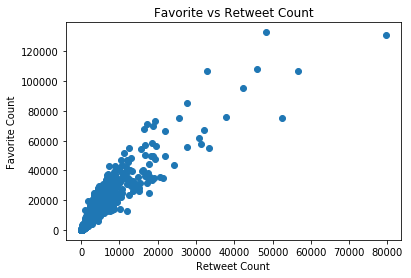

In [853]:
# plotting scatter plot of retweet vs favorite
plt.scatter(x="retweet_count", y="favorite_count", data=df)
plt.title('Favorite vs Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

##### Insight and visualization 2
####  What is the most frequent dog stage ?

In [854]:
# Finding most frequent dog stage
v2=df['dog_stage'].value_counts()

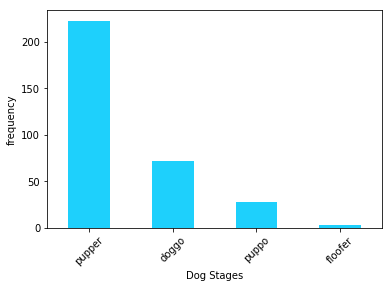

In [855]:
# plotting most frequent dig stage
v2.plot(kind='bar', color='#1ed0fc', rot=45)
plt.xlabel('Dog Stages')
plt.ylabel('frequency');

##### Insight and visualization 3
#### Which are the top 10 frequent dog breeds?

In [856]:
# we will count the p1 values to get the mostrequent dog breeds
v3= df['p1'].value_counts().head(10)
v3

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy_poodle             38
pomeranian             38
malamute               29
Name: p1, dtype: int64

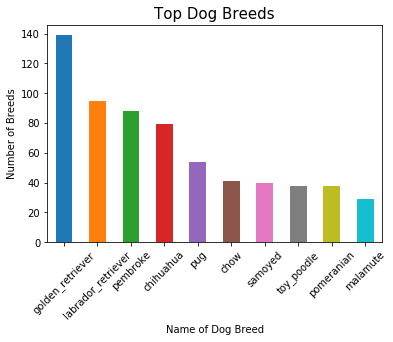

In [857]:
# Now we will plot the results.
v3.plot(kind='bar', rot=45)
plt.ylabel('Number of Breeds')
plt.title('Top Dog Breeds', size=15)
plt.xlabel('Name of Dog Breed');

##### Insight and visualization 4
#### Which is the most used source?

In [858]:
# finding most used source
v4= df['source'].value_counts()
v4

Twitter for iPhone    1956
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Text(0.5,0,'frequency')

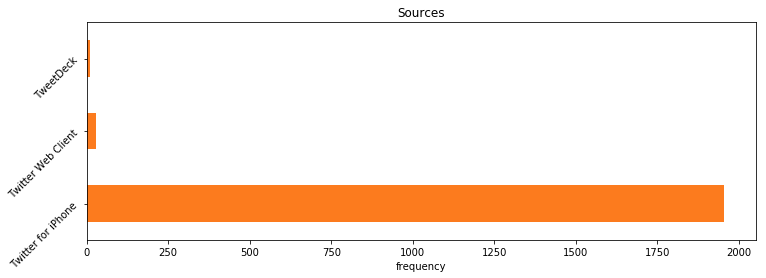

In [859]:
# plottiing the above result
plt.figure(figsize=(12,4))
v4.plot(kind='barh', color='#fc7b1e', rot=45)
plt.title('Sources')
plt.xlabel('frequency')

##### Insight and visualization 5
#### Which dog_stages are most favorites ?

(0, 70000)

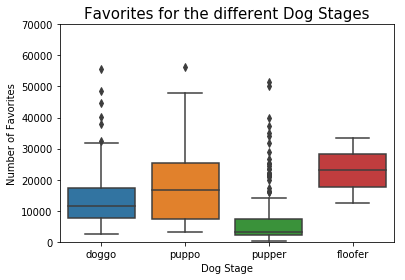

In [860]:
# plotting boxplot with seaborn library to see which dog stage is most favorite
sns.boxplot(x='dog_stage', y='favorite_count', data=df)
plt.title('Favorites for the different Dog Stages', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Number of Favorites')
plt.ylim(0,70000)

<a id='conclusions'></a>
### Conclusions

 1. Favorite and retweet counts are highly correlated in positive manner.
 2. pupper is the most common dog stage followed by doggo.
 3. Golden_retreiver is the most common dog breed in the dataset.
 4. Iphone is the most common source.
 5. Puppo is the most favourite dog stage and pupper is the least favorite dog stage 